In [ ]:
! pip install lmdb
! pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2 torchtext==0.15.2+cpu torchdata==0.6.1 --index-url https://download.pytorch.org/whl/cu118
! pip install diffusers xformers transformers scipy ftfy accelerate controlnet_aux

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 2.2 MB/s eta 0:00:00
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 643.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=89990 sha256=bb10555ddede60f543122d99851781bd017ae06d9f7c182d4530c916a06d630d
  Stored in directory: /root/.cache/pip/wheels/27/2c/b6/3ed2983b1b44fe0dea1bb35234b09f2c22fb8ebb308679c922
Success

In [ ]:
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image
import torch

pipe = AutoPipelineForInpainting.from_pretrained(
    "diffusers/stable-diffusion-xl-1.0-inpainting-0.1",
    torch_dtype=torch.float16,
    variant="fp16"
).to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


In [ ]:
words = {
    "HELLO",
    "awesome",
    "Sample Text",
    "new year",
    "COURAGE"
}

In [ ]:
import os, os.path

images_path = "/content/test_data/images"
masks_path = "/content/test_data/masks"
description_path = "/content/test_data/desc.txt"

desc_file = open(description_path)
desc_lines = desc_file.read().splitlines()
desc_file.close()

output_path = "/content/outputs_sdxl"

if not os.path.exists(output_path):
    os.makedirs(output_path)

  0%|          | 0/19 [00:00<?, ?it/s]

(Sample Text) written on a (white) (wall)


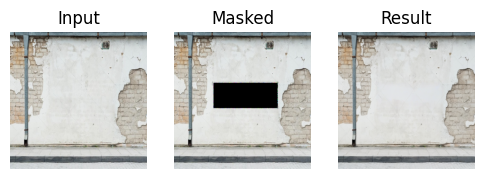

  0%|          | 0/19 [00:00<?, ?it/s]

(Sample Text) written on a (white) (whiteboard)


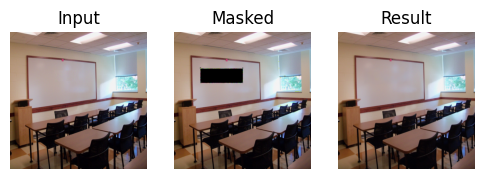

  0%|          | 0/19 [00:00<?, ?it/s]

(Sample Text) written on a (white) (flag)


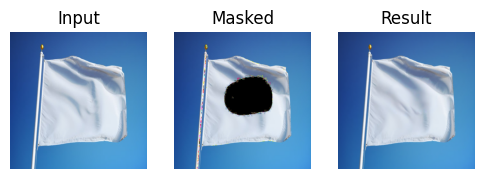

  0%|          | 0/19 [00:00<?, ?it/s]

(Sample Text) written on a (purple) (shirt)


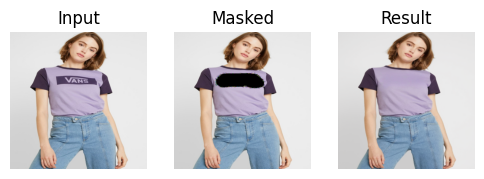

  0%|          | 0/19 [00:00<?, ?it/s]

(Sample Text) written on a (brown) (sign)


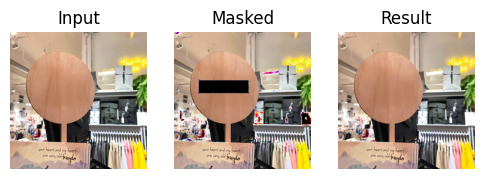

  0%|          | 0/19 [00:00<?, ?it/s]

(Sample Text) written on a (white) (mug)


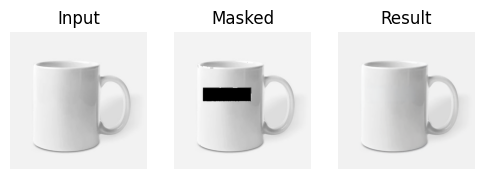

  0%|          | 0/19 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

for word in words:
  for i in range(len(desc_lines)):
    # load the image
    image = load_image(
        os.path.join(images_path, f"{i}.jpg")
    ).resize((512, 512))

    # load the mask image
    mask_image = load_image(
        os.path.join(masks_path, f"{i}.jpg")
    ).resize((512, 512))

    text_prompt = f"({word}) written on a {desc_lines[i]}"

    # generate image
    generator = torch.manual_seed(5)
    new_image = pipe(
      prompt=text_prompt,
      negative_prompt="poor quality, bad, worst, gibberish, unnatural, patched, cropped, flat, extra words, unrealistic, fade",
      image=image,
      mask_image=mask_image,
      guidance_scale=8,
      num_inference_steps=20,
      strength=0.99,
      generator=generator,
    ).images[0]

    # show the images
    print(text_prompt)
    plt.figure(figsize=(6,2))
    plt.subplot(1,3,1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Input')
    plt.subplot(1,3,2)
    plt.imshow((255-np.array(image))*(255-np.array(mask_image)))
    plt.axis('off')
    plt.title('Masked')
    plt.subplot(1,3,3)
    plt.imshow(new_image)
    plt.axis('off')
    plt.title('Result')
    plt.show()

    new_image.save(os.path.join(output_path, f"{word}_{i}.jpg"))

download the generated images

In [ ]:
!zip -r /content/outputs_sdxl.zip /content/outputs_sdxl

from google.colab import files
files.download("/content/outputs_sdxl.zip")

  adding: content/outputs_sdxl/ (stored 0%)
  adding: content/outputs_sdxl/awesome_0.jpg (deflated 1%)
  adding: content/outputs_sdxl/HELLO_2.jpg (deflated 8%)
  adding: content/outputs_sdxl/Sample Text_16.jpg (deflated 11%)
  adding: content/outputs_sdxl/HELLO_12.jpg (deflated 9%)
  adding: content/outputs_sdxl/awesome_16.jpg (deflated 11%)
  adding: content/outputs_sdxl/awesome_3.jpg (deflated 8%)
  adding: content/outputs_sdxl/COURAGE_1.jpg (deflated 1%)
  adding: content/outputs_sdxl/new year_12.jpg (deflated 8%)
  adding: content/outputs_sdxl/HELLO_11.jpg (deflated 6%)
  adding: content/outputs_sdxl/Sample Text_5.jpg (deflated 39%)
  adding: content/outputs_sdxl/awesome_1.jpg (deflated 1%)
  adding: content/outputs_sdxl/new year_16.jpg (deflated 11%)
  adding: content/outputs_sdxl/Sample Text_13.jpg (deflated 8%)
  adding: content/outputs_sdxl/HELLO_6.jpg (deflated 9%)
  adding: content/outputs_sdxl/new year_8.jpg (deflated 9%)
  adding: content/outputs_sdxl/Sample Text_1.jpg (def

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

run OCR and compute the metric

In [ ]:
! pip install opencv-python easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 40.5 MB/s eta 0:00:00


In [ ]:
from easyocr import Reader
import cv2

result_file = open("easyocr_result.txt", "w")

reader = Reader(['en'], gpu=True)

for filename in os.listdir(output_path):
  image = cv2.imread(os.path.join(output_path, filename))
  results = reader.readtext(image)
  text = ' '.join([res[1] for res in results])
  result_file.write(f"{filename}${filename.split('_')[0]}${text}\n")

result_file.close()

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
from difflib import SequenceMatcher

res_file = open("easyocr_result.txt")
res_lines = res_file.read().splitlines()
res_file.close()

sum = 0
for r in res_lines:
  a = r.split('$')[1]
  g = r.split('$')[2]
  # added lower() only for testing SD and SDXL
  sum += SequenceMatcher(None, a.lower(), g.lower()).ratio()

sum / len(res_lines)

0.28022317743771036